In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import datetime
import json

In [130]:
# Import stock prices of involved companies
global_stock_prices_df = pd.read_csv('/Users/connor.stevens/Documents/global_stock_data.csv')
global_stock_prices_df.head()

,gvkey,iid,datadate,conm,cshoc,cshtrd,prccd,trfd,isin
0,9818,01W,2015-10-01,SONY GROUP CORPORATION,1.262162e+09,12208200.0,2996.0,1.273351,JP3435000009
1,9818,01W,2015-10-02,SONY GROUP CORPORATION,1.262162e+09,9628600.0,3094.0,1.273351,JP3435000009
2,9818,01W,2015-10-05,SONY GROUP CORPORATION,1.262162e+09,8807600.0,3142.0,1.273351,JP3435000009
3,9818,01W,2015-10-06,SONY GROUP CORPORATION,1.262162e+09,6426700.0,3156.0,1.273351,JP3435000009
4,9818,01W,2015-10-07,SONY GROUP CORPORATION,1.262162e+09,6163800.0,3205.0,1.273351,JP3435000009


In [131]:
us_stock_prices_df = pd.read_csv('/Users/connor.stevens/Documents/us_stock_data.csv')
us_stock_prices_df.head()

,gvkey,iid,datadate,tic,conm,cshoc,cshtrd,prccd,trfd
0,12141,1,2015-10-01,MSFT,MICROSOFT CORP,7.997981e+09,28564790.0,44.61,1.420765
1,12141,1,2015-10-02,MSFT,MICROSOFT CORP,7.997981e+09,41789610.0,45.57,1.420765
2,12141,1,2015-10-05,MSFT,MICROSOFT CORP,7.997981e+09,33546080.0,46.63,1.420765
3,12141,1,2015-10-06,MSFT,MICROSOFT CORP,7.997981e+09,27504360.0,46.75,1.420765
4,12141,1,2015-10-07,MSFT,MICROSOFT CORP,7.997981e+09,27695610.0,46.80,1.420765


In [132]:
# Get names of invovled companies.
us_stock_prices_df['conm'].unique()

array(['MICROSOFT CORP', 'ELECTRONIC ARTS INC',
       'TAKE-TWO INTERACTIVE SFTWR', 'ACTIVISION BLIZZARD INC'],
      dtype=object)

In [133]:
# Get names of involved companies.
global_stock_prices_df['conm'].unique()

array(['SONY GROUP CORPORATION', 'NINTENDO CO LTD',
       'KONAMI GROUP CORPORATION', 'CAPCOM CO LTD',
       'BANDAI NAMCO HOLDINGS INC', 'KOEI TECMO HOLDINGS CO LTD',
       'UBI SOFT ENTERTAINMENT SA', 'SQUARE ENIX HLDGS CO LTD',
       'KADOKAWA CORPORATION', 'SEGA SAMMY HLDGS INC', 'STARBREEZE AB',
       'DIGITAL BROS SPA', 'CD PROJEKT SA', "YUKE'S CO LTD",
       'MARVELOUS INC', 'NIHON FALCOM CORP', 'FUNCOM SE', 'NEOWIZ',
       'NIPPON ICHI SOFTWARE INC', 'CI GAMES SE', '11 BIT STUDIOS SA',
       'BLOOBER TEAM SA', 'FRONTIER DEVELOPMENTS PLC',
       'FOCUS ENTERTAINMENT SOCIETE', 'FURYU CORP',
       'PARADOX INTERACTIVE AB', 'FOREVER ENTERTAINMENT SA', 'PLAYWAY SA',
       'ARTIFEX MUNDI SA', 'REMEDY', "DON'T NOD ENTR SA",
       'TEAM17 GROUP PLC', 'ZORDIX AB', 'NACON SA', 'GAMES OPERATORS SA',
       'ALL IN GAMES SA', 'THUNDERFUL GROUP AB', 'KRAFTO INC',
       'DEVOLVER DIGITAL INC', 'BIG CHEESE STUDIO SPOLKA'], dtype=object)

Need to join the US and Global datasets together before continuing. Begin by changing the name of `isin` column in global and `tic` in us to `stock_id`.

In [134]:
# Make a column called stock_id in us dataset and copy gvkey into it.
us_stock_prices_df['stock_id'] = us_stock_prices_df['gvkey']

In [135]:
# Rename isin and tic to stock_id.
global_stock_prices_df = global_stock_prices_df.rename(columns={'isin': 'stock_id'})


In [136]:
# Drop tic column as it does not exist in the global dataset. Removing in necessary before joining the datasets.
us_stock_prices_df = us_stock_prices_df.drop('tic', axis=1)

Next, concatenate the two datasets into a single dataset now that they both have the same column names.

In [137]:
# List of dataframes to concatenate.
dataframes = [global_stock_prices_df, us_stock_prices_df]
stock_data_df = pd.concat(dataframes)
stock_data_df.head()

,gvkey,iid,datadate,conm,cshoc,cshtrd,prccd,trfd,stock_id
0,9818,01W,2015-10-01,SONY GROUP CORPORATION,1.262162e+09,12208200.0,2996.0,1.273351,JP3435000009
1,9818,01W,2015-10-02,SONY GROUP CORPORATION,1.262162e+09,9628600.0,3094.0,1.273351,JP3435000009
2,9818,01W,2015-10-05,SONY GROUP CORPORATION,1.262162e+09,8807600.0,3142.0,1.273351,JP3435000009
3,9818,01W,2015-10-06,SONY GROUP CORPORATION,1.262162e+09,6426700.0,3156.0,1.273351,JP3435000009
4,9818,01W,2015-10-07,SONY GROUP CORPORATION,1.262162e+09,6163800.0,3205.0,1.273351,JP3435000009


In [138]:
# Check the number of unique company names to make sure they are all there now.
print(len(stock_data_df['conm'].unique()))
print(stock_data_df['conm'].unique())

44
['SONY GROUP CORPORATION' 'NINTENDO CO LTD' 'KONAMI GROUP CORPORATION'
 'CAPCOM CO LTD' 'BANDAI NAMCO HOLDINGS INC' 'KOEI TECMO HOLDINGS CO LTD'
 'UBI SOFT ENTERTAINMENT SA' 'SQUARE ENIX HLDGS CO LTD'
 'KADOKAWA CORPORATION' 'SEGA SAMMY HLDGS INC' 'STARBREEZE AB'
 'DIGITAL BROS SPA' 'CD PROJEKT SA' "YUKE'S CO LTD" 'MARVELOUS INC'
 'NIHON FALCOM CORP' 'FUNCOM SE' 'NEOWIZ' 'NIPPON ICHI SOFTWARE INC'
 'CI GAMES SE' '11 BIT STUDIOS SA' 'BLOOBER TEAM SA'
 'FRONTIER DEVELOPMENTS PLC' 'FOCUS ENTERTAINMENT SOCIETE' 'FURYU CORP'
 'PARADOX INTERACTIVE AB' 'FOREVER ENTERTAINMENT SA' 'PLAYWAY SA'
 'ARTIFEX MUNDI SA' 'REMEDY' "DON'T NOD ENTR SA" 'TEAM17 GROUP PLC'
 'ZORDIX AB' 'NACON SA' 'GAMES OPERATORS SA' 'ALL IN GAMES SA'
 'THUNDERFUL GROUP AB' 'KRAFTO INC' 'DEVOLVER DIGITAL INC'
 'BIG CHEESE STUDIO SPOLKA' 'MICROSOFT CORP' 'ELECTRONIC ARTS INC'
 'TAKE-TWO INTERACTIVE SFTWR' 'ACTIVISION BLIZZARD INC']


In [139]:
# Rename single dataframe columns to be more self-explanatory.
stock_data_df = stock_data_df.rename(columns={
    'conm': 'company_name',
    'cshoc': 'shares_outstanding',
    'cshtrd': 'trading_volume',
    'prccd': 'closing_price',
    'trfd': 'total_return_factor'
    })

<Axes: >

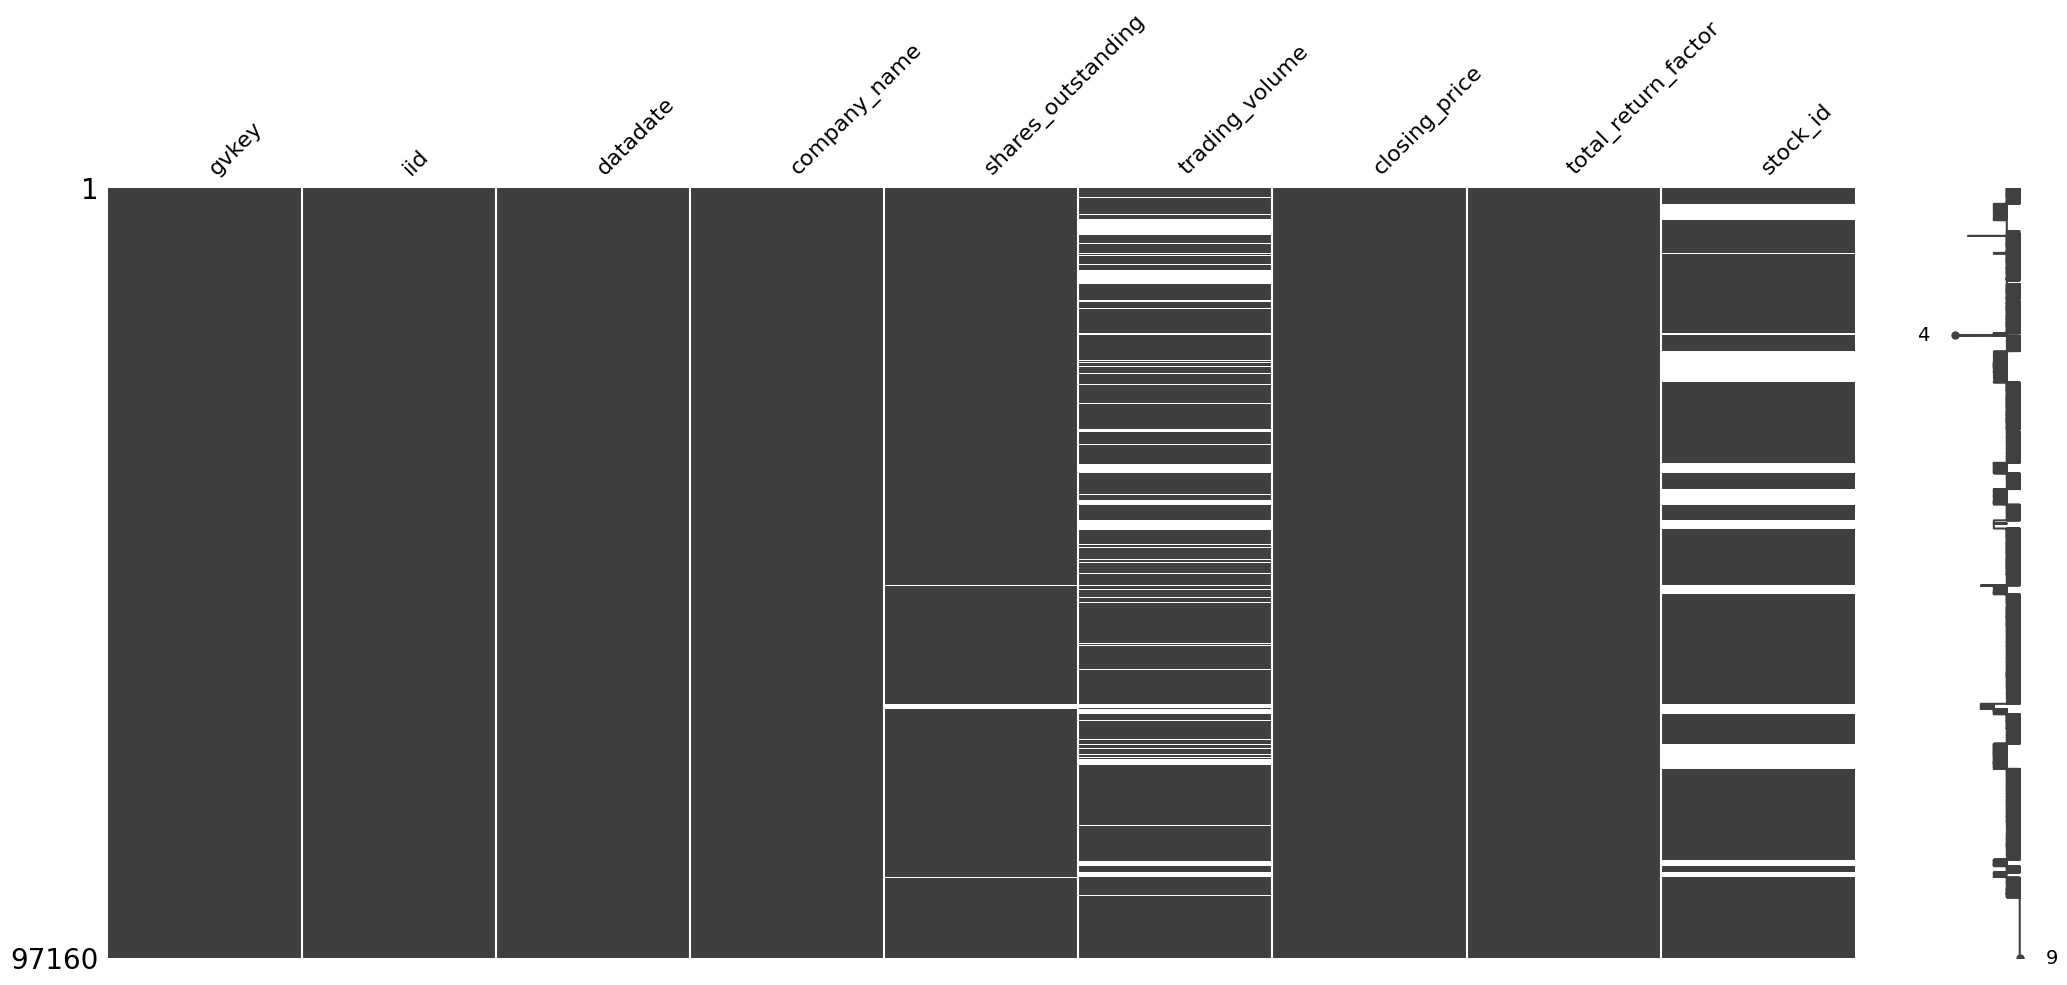

In [140]:
# Check how much missing data is present in the combined dataset.
# Plot missing data.
%matplotlib inline

msno.matrix(stock_data_df)

There is data missing for shares outstanding, trading volume and stock_id, this needs to be investigated further.

In [141]:
stock_data_df[stock_data_df['shares_outstanding'].isna()]

,gvkey,iid,datadate,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id
6046,9818,94W,2020-03-27,SONY GROUP CORPORATION,NaN,NaN,NaN,NaN,BRSNECBDR002
6047,9818,94W,2020-09-28,SONY GROUP CORPORATION,NaN,NaN,NaN,NaN,BRSNECBDR002
6048,9818,94W,2021-03-29,SONY GROUP CORPORATION,NaN,NaN,NaN,NaN,BRSNECBDR002
6049,9818,94W,2021-09-28,SONY GROUP CORPORATION,NaN,NaN,NaN,NaN,BRSNECBDR002
6050,9818,94W,2022-03-29,SONY GROUP CORPORATION,NaN,NaN,NaN,NaN,BRSNECBDR002
...,...,...,...,...,...,...,...,...,...
87019,343796,01W,2020-10-05,ALL IN GAMES SA,NaN,12409.0,22.9,1.022222,PLSNTFG00017
87020,343796,01W,2020-10-06,ALL IN GAMES SA,NaN,12584.0,23.0,1.022222,PLSNTFG00017
87021,343796,01W,2020-10-07,ALL IN GAMES SA,NaN,6582.0,22.8,1.022222,PLSNTFG00017
87022,343796,01W,2020-10-08,ALL IN GAMES SA,NaN,23621.0,22.7,1.022222,PLSNTFG00017


In [142]:
stock_data_df[stock_data_df['trading_volume'].isna()]

,gvkey,iid,datadate,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id
7,9818,01W,2015-10-12,SONY GROUP CORPORATION,1.262209e+09,NaN,3211.000,1.273351,JP3435000009
23,9818,01W,2015-11-03,SONY GROUP CORPORATION,1.262216e+09,NaN,3433.000,1.273351,JP3435000009
37,9818,01W,2015-11-23,SONY GROUP CORPORATION,1.262222e+09,NaN,3285.000,1.273351,JP3435000009
59,9818,01W,2015-12-23,SONY GROUP CORPORATION,1.262301e+09,NaN,2913.000,1.273351,JP3435000009
65,9818,01W,2015-12-31,SONY GROUP CORPORATION,1.262301e+09,NaN,3002.000,1.273351,JP3435000009
...,...,...,...,...,...,...,...,...,...
89411,351615,02W,2022-11-11,BIG CHEESE STUDIO SPOLKA,4.135000e+06,NaN,39.200,1.053591,PLA340200015
89442,351615,02W,2022-12-26,BIG CHEESE STUDIO SPOLKA,4.135000e+06,NaN,44.400,1.053591,PLA340200015
89451,351615,02W,2023-01-06,BIG CHEESE STUDIO SPOLKA,4.135000e+06,NaN,48.995,1.053591,PLA340200015
89516,351615,02W,2023-04-07,BIG CHEESE STUDIO SPOLKA,4.135000e+06,NaN,49.900,1.053591,PLA340200015


In [143]:
stock_data_df[stock_data_df['stock_id'].isna()]

,gvkey,iid,datadate,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id
1977,9818,02W,2015-10-01,SONY GROUP CORPORATION,1.262162e+09,715.0,21.685,1.136397,NaN
1978,9818,02W,2015-10-02,SONY GROUP CORPORATION,1.262162e+09,1669.0,22.775,1.136397,NaN
1979,9818,02W,2015-10-05,SONY GROUP CORPORATION,1.262162e+09,7900.0,23.535,1.136397,NaN
1980,9818,02W,2015-10-06,SONY GROUP CORPORATION,1.262162e+09,3440.0,23.540,1.136397,NaN
1981,9818,02W,2015-10-07,SONY GROUP CORPORATION,1.262162e+09,8060.0,23.600,1.136397,NaN
...,...,...,...,...,...,...,...,...,...
86929,338248,02W,2023-04-24,GAMES OPERATORS SA,5.499260e+06,NaN,3.290,1.079426,NaN
86930,338248,02W,2023-04-25,GAMES OPERATORS SA,5.499260e+06,NaN,3.300,1.079426,NaN
86931,338248,02W,2023-04-26,GAMES OPERATORS SA,5.499260e+06,NaN,3.190,1.079426,NaN
86932,338248,02W,2023-04-27,GAMES OPERATORS SA,5.499260e+06,NaN,3.180,1.079426,NaN


Next, join the Fama-French five factors to this dataset.

In [144]:
europe_ff_df = pd.read_csv('/Users/connor.stevens/Library/Mobile Documents/com~apple~CloudDocs/Masters Thesis Spring 2023/data/Europe_5_Factors_Daily.csv', skiprows=6)
europe_ff_df.head()

,date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,19900702,0.99,0.00,-0.56,0.43,-0.25,0.03
1,19900703,0.33,-0.09,0.00,0.02,0.28,0.03
2,19900704,0.24,0.03,-0.19,-0.09,0.23,0.03
3,19900705,-0.64,0.22,0.08,-0.36,0.07,0.03
4,19900706,0.07,-0.24,0.13,0.02,0.11,0.03


In [145]:
japan_ff_df = pd.read_csv('/Users/connor.stevens/Library/Mobile Documents/com~apple~CloudDocs/Masters Thesis Spring 2023/data/Japan_5_Factors_Daily.csv', skiprows=6)
japan_ff_df.head()

,date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,19900702,0.85,0.31,-0.05,-0.07,0.18,0.03
1,19900703,0.07,0.65,0.27,-0.28,0.27,0.03
2,19900704,1.45,0.50,0.25,-0.06,-0.10,0.03
3,19900705,-0.64,0.53,0.37,0.39,0.13,0.03
4,19900706,-0.02,0.52,0.22,0.21,-0.07,0.03


In [146]:
us_ff_df = pd.read_csv('/Users/connor.stevens/Library/Mobile Documents/com~apple~CloudDocs/Masters Thesis Spring 2023/data/North_America_5_Factors_Daily.csv', skiprows=6)
us_ff_df.head()

,date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,19900702,0.30,-0.36,-0.11,0.30,-0.02,0.03
1,19900703,0.13,-0.08,-0.41,0.41,-0.20,0.03
2,19900704,-0.02,-0.02,0.02,-0.01,0.00,0.03
3,19900705,-0.99,0.45,0.10,-0.09,-0.01,0.03
4,19900706,0.56,-0.52,-0.36,0.38,-0.02,0.03


`date` column in currently an integer, this needs to be parsed to be datetime.

In [147]:
# Write function for parsing the date
def parse_date_column(date_int):

    # Convert integer to string.
    date_string = str(date_int)
    
    return datetime.datetime.strptime(date_string, '%Y%m%d')

In [148]:
# Parse dates on all dfs.
# NOT IDEMPOTENT, only run once.
europe_ff_df['date'] = europe_ff_df['date'].map(parse_date_column)
japan_ff_df['date'] = japan_ff_df['date'].map(parse_date_column)
us_ff_df['date'] = us_ff_df['date'].map(parse_date_column)
europe_ff_df.head()

,date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,1990-07-02,0.99,0.00,-0.56,0.43,-0.25,0.03
1,1990-07-03,0.33,-0.09,0.00,0.02,0.28,0.03
2,1990-07-04,0.24,0.03,-0.19,-0.09,0.23,0.03
3,1990-07-05,-0.64,0.22,0.08,-0.36,0.07,0.03
4,1990-07-06,0.07,-0.24,0.13,0.02,0.11,0.03


In order to join the returns and FF factors, a region flag is needed in stock_data_df.

In [150]:
# Get all companies data.
with open('companies.json') as json_file:
  companies_list = json.load(json_file)

In [151]:
# Create a list of region stock_ids.
eu_ids = []
jp_ids = []
us_ids = []
for company in companies_list:
    if company['region'] == 'eu':
        eu_ids.append(company['stock_id'])

    if company['region'] == 'jp':
        jp_ids.append(company['stock_id'])

    if company['region'] == 'us':
        us_ids.append(company['stock_id'])
    

In [156]:
# Function for creating region booleans.
def is_jp_region(stock_id):
    if stock_id in jp_ids:
        return True
    else:
        return False

def is_eu_region(stock_id):
    if stock_id in eu_ids:
        return True
    else:
        return False
    
def is_us_region(stock_id):
    if stock_id in us_ids:
        return True
    else:
        return False

In [157]:
# Create region bool columns.
stock_data_df['eu'] = stock_data_df['stock_id'].map(is_eu_region)
stock_data_df['jp'] = stock_data_df['stock_id'].map(is_jp_region)
stock_data_df['us'] = stock_data_df['stock_id'].map(is_us_region)
stock_data_df.head()

,gvkey,iid,datadate,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id,eu,jp,us
0,9818,01W,2015-10-01,SONY GROUP CORPORATION,1.262162e+09,12208200.0,2996.0,1.273351,JP3435000009,False,True,False
1,9818,01W,2015-10-02,SONY GROUP CORPORATION,1.262162e+09,9628600.0,3094.0,1.273351,JP3435000009,False,True,False
2,9818,01W,2015-10-05,SONY GROUP CORPORATION,1.262162e+09,8807600.0,3142.0,1.273351,JP3435000009,False,True,False
3,9818,01W,2015-10-06,SONY GROUP CORPORATION,1.262162e+09,6426700.0,3156.0,1.273351,JP3435000009,False,True,False
4,9818,01W,2015-10-07,SONY GROUP CORPORATION,1.262162e+09,6163800.0,3205.0,1.273351,JP3435000009,False,True,False


With the region flags, it is now possible to join the Fama French 5 factor data to the stock dataset.